In [1]:
import sys
sys.path.insert(0, '/root/')

In [8]:
from tpqoa import tpqoa
import numpy as np
import pandas as pd
import tables as tb
import tstables as tstb
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn import linear_model
import pickle

In [3]:
h6 = pd.HDFStore('/root/pyalgocourse/test_project/data_features.h5','r')

In [4]:
data = h6['data']

In [5]:
h6.close()

## Select the test dataset

In [15]:
test = data[9600:]
final_test = test.copy()

In [9]:
# use this to drop some of the lagged returns, drop none, drop = 30, drop all, drop =0 
drop = 29
dropped = []
for drop in range(drop+1,30+1):
    drp = 'lag_%d' % drop
    dropped.append(drp)
cols = data.columns.drop(dropped)
cols = cols.drop(['AUDUSD','Returns'])
cols

Index(['RSI', 'MACD', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6',
       'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11', 'lag_12', 'lag_13',
       'lag_14', 'lag_15', 'lag_16', 'lag_17', 'lag_18', 'lag_19', 'lag_20',
       'lag_21', 'lag_22', 'lag_23', 'lag_24', 'lag_25', 'lag_26', 'lag_27',
       'lag_28', 'lag_29', 'MOM1', 'MOM2'],
      dtype='object')

## load the model from pickle

In [11]:
LinMod = pickle.load(open('final_model.sav', 'rb'))

## Run the model on test dataset

In [13]:
pred = LinMod.predict(test[cols])

In [16]:
final_test.loc[:,'Position'] = pred

In [17]:
final_test.loc[:,'Strategy'] = final_test.loc[:,'Position'] * final_test.loc[:,'Returns']

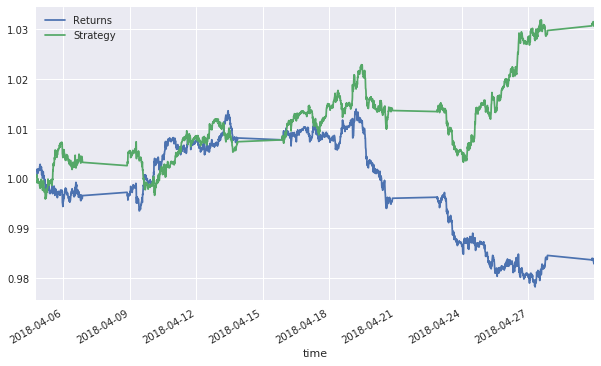

In [20]:
final_test[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10,6));

In [21]:
mean = final_test[['Returns','Strategy']].mean() * 6 * 24 * 252
mean

Returns    -0.25103
Strategy    0.44461
dtype: float64